<a href="https://colab.research.google.com/github/Arju-Jawla/Mean-Sea-Level-Anomalies/blob/main/MSLA_08_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. INSTALLING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.metrics import mean_squared_error

## 2. UPLOADING DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Untitled4Project Learnings/Data/sla_ports_data.csv')

### 2.1 Extract only Vishakhapatnam dat

In [ ]:
df_vsk = df[['Date', 'Vishakhapatnam']].copy()

## 3.LSTM

In [ ]:
# Set parameters for your model
sequence_length = 12  # Look-back period
n_units = 100         # Number of LSTM units
n_epochs = 100        # Number of training epochs
batch_size = 16       # Batch size
dropout_rate = 0.2    # Dropout rate for regularization

In [ ]:
# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_vsk[['Vishakhapatnam']])

In [ ]:
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])

In [ ]:
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape to [samples, time steps, features]

In [ ]:
# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(n_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))
model.add(LSTM(n_units))
model.add(Dropout(dropout_rate))
model.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.1152 - val_loss: 0.0543
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0377 - val_loss: 0.0316
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0260 - val_loss: 0.0268
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0329 - val_loss: 0.0287
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0277 - val_loss: 0.0304
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0291 - val_loss: 0.0278
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0308 - val_loss: 0.0258
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0307 - val_loss: 0.0301
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0271 - val_loss: 0.0389
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0255 - val_loss: 0.0403
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0276 - val_loss: 0.0291
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/ste

In [ ]:
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse scaling to original values

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step


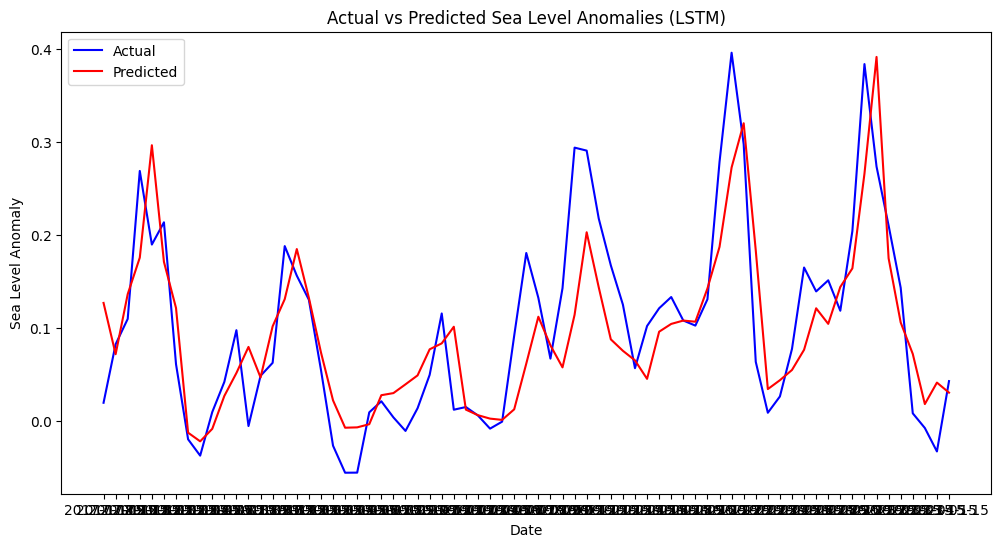

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_vsk['Date'][train_size + sequence_length:], df_vsk['Vishakhapatnam'][train_size + sequence_length:], color='blue', label='Actual')
plt.plot(df_vsk['Date'][train_size + sequence_length:], predicted, color='red', label='Predicted')
plt.title('Actual vs Predicted Sea Level Anomalies (LSTM)')
plt.xlabel('Date')
plt.ylabel('Sea Level Anomaly')
plt.legend()
plt.show()

In [ ]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_vsk['Vishakhapatnam'][train_size + sequence_length:], predicted)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00362014710971987


 * model has improved the Mean Squared Error (MSE) significantly. A lower MSE indicates that the model is making more accurate predictions compared to the actual sea level anomalies.